In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tabulate
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data_frame = pd.read_csv("googleplaystore.csv")

In [3]:

def Title(text):
    plt.figure(figsize=(15, 1))
    plt.text(0.5, 0.5, text, ha='center', fontsize=18)
    plt.axis('off')  
    plt.show()

In [4]:
data_frame.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [5]:
data_frame = data_frame.drop(["Last Updated","Current Ver","Android Ver"], axis=1)
data_frame = data_frame.drop(10472)#Strange element
data_frame

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference


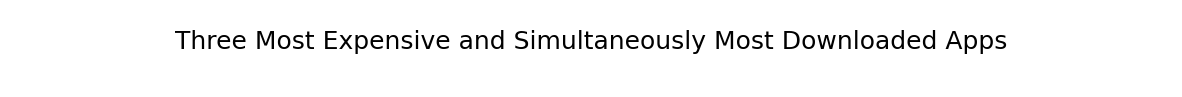

+---------+--------------------------+------------+----------+-----------+--------+------------+--------+---------+------------------+-----------+
|   index | App                      | Category   |   Rating |   Reviews | Size   |   Installs | Type   |   Price | Content Rating   | Genres    |
+=========+==========================+============+==========+===========+========+============+========+=========+==================+===========+
|    4367 | I'm Rich - Trump Edition | LIFESTYLE  |      3.6 |       275 | 7.3M   |      10000 | Paid   |  400    | Everyone         | Lifestyle |
+---------+--------------------------+------------+----------+-----------+--------+------------+--------+---------+------------------+-----------+
|    5351 | I am rich                | LIFESTYLE  |      3.8 |      3547 | 1.8M   |     100000 | Paid   |  399.99 | Everyone         | Lifestyle |
+---------+--------------------------+------------+----------+-----------+--------+------------+--------+---------+---

In [6]:

title = "Three Most Expensive and Simultaneously Most Downloaded Apps"
Title(title)

top_3_elements = data_frame.copy()
top_3_elements['Price'] = pd.to_numeric(top_3_elements['Price'].str.replace('$', ''), errors='coerce', downcast='float')
top_3_elements['Installs'] = pd.to_numeric(top_3_elements['Installs'].str.replace('+', '').str.replace(',', ''),downcast='float')
top_3_elements = top_3_elements.sort_values(by=["Price", "Installs"], ascending=[False, False]).reset_index().head(3)
table_data = top_3_elements.values.tolist()
headers = top_3_elements.columns.tolist()
print(tabulate.tabulate(table_data, headers=headers, tablefmt="grid"))

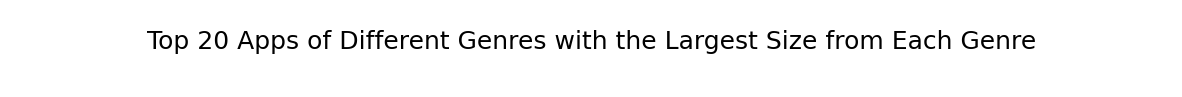

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
1713,Miraculous Ladybug & Cat Noir - The Official Game,GAME,4.5,183846,99M,"10,000,000+",Free,0,Everyone,Action
1958,DC Super Hero Girls™,GAME,4.3,43055,95M,"5,000,000+",Free,0,Everyone,Action;Action & Adventure
10100,Eyes - The Scary Horror Game Adventure,GAME,4.4,499483,99M,"10,000,000+",Free,0,Teen,Adventure
6202,LEGO ® Batman: Beyond Gotham,FAMILY,4.1,10758,8.0M,"100,000+",Paid,$4.99,Everyone 10+,Adventure;Action & Adventure
5411,The Hunt for the Lost Treasure,FAMILY,4.6,7148,8.1M,"100,000+",Paid,$2.99,Everyone,Adventure;Brain Games
2148,Masha and the Bear Child Games,FAMILY,4.1,288523,92M,"10,000,000+",Free,0,Everyone,Adventure;Education
1789,Tank Stars,GAME,4.3,174755,98M,"10,000,000+",Free,0,Everyone 10+,Arcade
7610,Ski Safari: Adventure Time,FAMILY,4.5,48754,9.3M,"100,000+",Paid,$0.99,Everyone,Arcade;Action & Adventure
2069,LEGO® Friends: Heartlake Rush,FAMILY,4.5,23671,91M,"1,000,000+",Free,0,Everyone,Arcade;Pretend Play
39,How To Color Disney Princess - Coloring Pages,ART_AND_DESIGN,4.0,591,9.4M,"500,000+",Free,0,Everyone,Art & Design


In [7]:
title = "Top 20 Apps of Different Genres with the Largest Size from Each Genre"
Title(title)
size_data_frame = data_frame[data_frame["Size"] != "Varies with device"]
size_data_frame.loc[size_data_frame.groupby('Genres')['Size'].idxmax().head(20)]


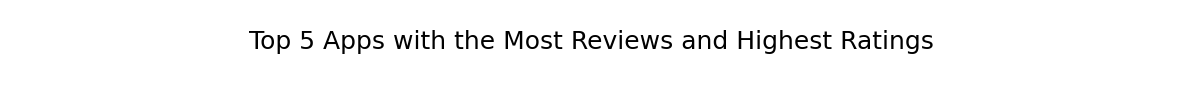

+------+------------------+--------------+----------+-----------+--------------------+------------+--------+---------+------------------+--------------+
|      | App              | Category     |   Rating |   Reviews | Size               | Installs   | Type   |   Price | Content Rating   | Genres       |
+======+==================+==============+==========+===========+====================+============+========+=========+==================+==============+
| 9496 | Master E.K       | FAMILY       |        5 |        90 | Varies with device | 1,000+     | Free   |       0 | Everyone         | Education    |
+------+------------------+--------------+----------+-----------+--------------------+------------+--------+---------+------------------+--------------+
| 5245 | AJ RETAILS       | SHOPPING     |        5 |         9 | 169k               | 10+        | Free   |       0 | Everyone         | Shopping     |
+------+------------------+--------------+----------+-----------+-----------------

In [10]:
title = "Top 5 Apps with the Most Reviews and Highest Ratings"
Title(title)

print(tabulate.tabulate(data_frame.sort_values(by=["Rating", "Reviews"], ascending=[False, False]).head(5),headers='keys', tablefmt='grid'))

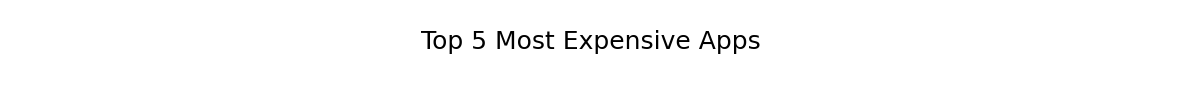

+------+-------------------------------+---------------------+----------+-----------+--------+------------+--------+---------+------------------+-------------------+
|      | App                           | Category            |   Rating |   Reviews | Size   | Installs   | Type   | Price   | Content Rating   | Genres            |
+======+===============================+=====================+==========+===========+========+============+========+=========+==================+===================+
| 4938 | Pocket AC                     | PHOTOGRAPHY         |      4.8 |       130 | 4.4M   | 1,000+     | Paid   | $9.99   | Everyone         | Photography       |
+------+-------------------------------+---------------------+----------+-----------+--------+------------+--------+---------+------------------+-------------------+
| 6205 | Baldur's Gate II              | FAMILY              |      4.3 |      5442 | 16M    | 50,000+    | Paid   | $9.99   | Teen             | Role Playing      |
+---

In [11]:
title = "Top 5 Most Expensive Apps"
Title(title)
print(tabulate.tabulate(data_frame[data_frame["Price"] != "0"].sort_values(by="Price", ascending=False).head(5), headers='keys', tablefmt='grid'))

In [12]:
df = pd.DataFrame(data_frame)

print(df.dtypes)
new_data = data_frame.copy()
new_data['Reviews'] = pd.to_numeric(new_data["Reviews"], downcast="float")
new_data.head(5).sort_values(by='Reviews', axis=0)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
dtype: object


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design


10840


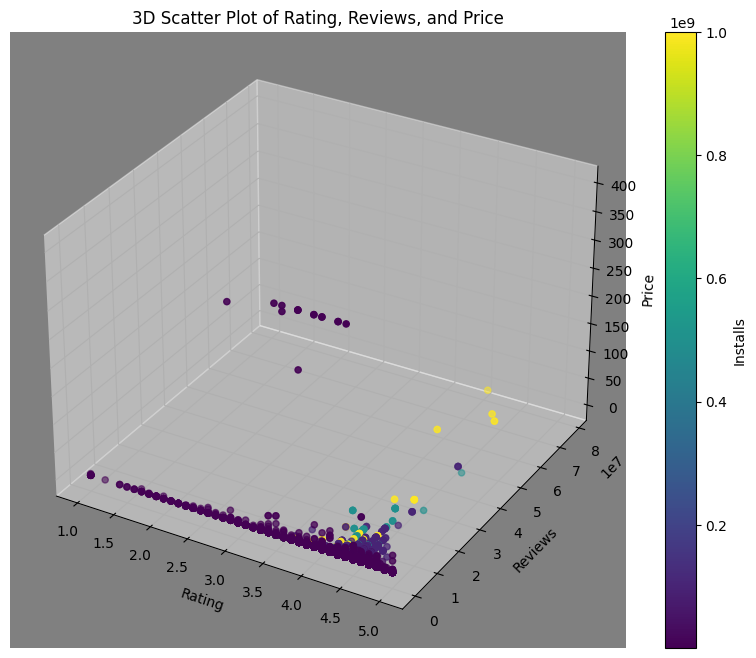

In [13]:

new_data = data_frame.copy()
new_data['Rating'] = pd.to_numeric(data_frame['Rating'], errors='coerce', downcast='float')
new_data['Reviews'] = pd.to_numeric(data_frame['Reviews'], errors='coerce',downcast='float')

print(len(new_data))
new_data['Price'] = pd.to_numeric(data_frame['Price'].str.replace('$', ''), errors='coerce', downcast='float')
new_data['Installs'] = pd.to_numeric(data_frame['Installs'].str.replace('+', '').str.replace(',', ''),downcast='float')


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(new_data['Rating'], new_data['Reviews'], new_data['Price'], c=new_data['Installs'], cmap='viridis')

ax.set_xlabel('Rating')
ax.set_ylabel('Reviews')
ax.set_zlabel('Price')
ax.set_title('3D Scatter Plot of Rating, Reviews, and Price')

# Add color bar
cbar = fig.colorbar(scatter)
cbar.set_label('Installs')

# Set background color
ax.set_facecolor('grey')  # or 'grey'

plt.show()

C:\Users\roman\AppData\Local\Temp\ipykernel_23512\2581956339.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Rating", y="Category", data=rating_means, color="skyblue", edgecolor="black", palette=random_colors)


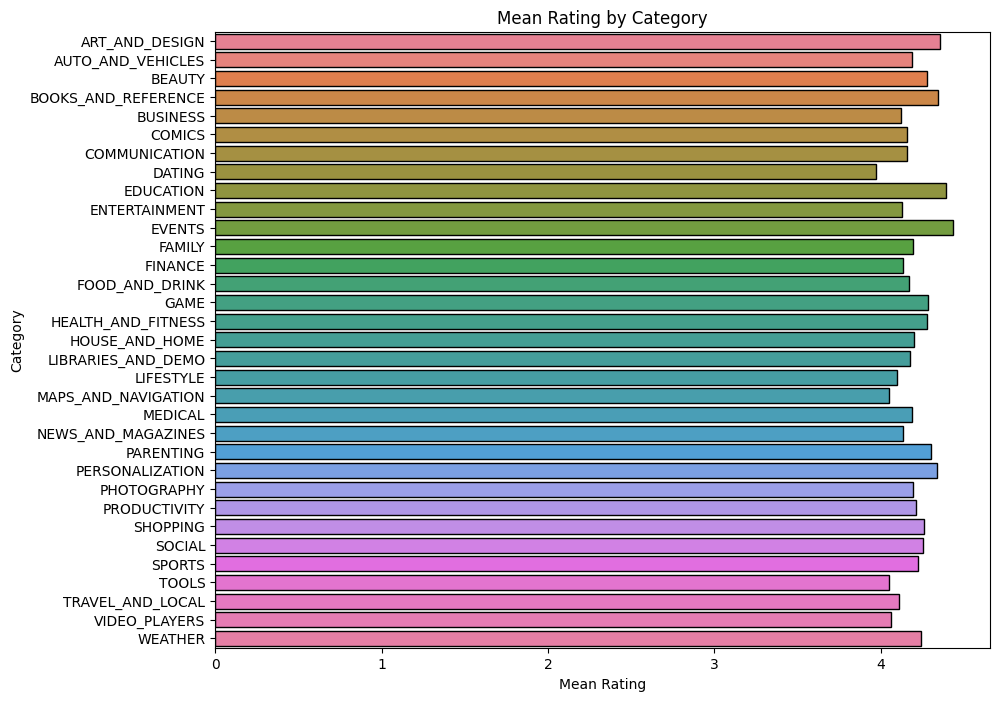

In [14]:
rating_means = data_frame.groupby("Category")["Rating"].mean().reset_index()
num_categories = len(rating_means)
random_colors = sns.color_palette("husl", num_categories)

plt.figure(figsize=(10, 8))
sns.barplot(x="Rating", y="Category", data=rating_means, color="skyblue", edgecolor="black", palette=random_colors)


plt.xlabel("Mean Rating")
plt.ylabel("Category")
plt.title("Mean Rating by Category")

plt.show()

C:\Users\roman\AppData\Local\Temp\ipykernel_23512\2305592912.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="Rating", y="Reviews", data=new_data, palette=random_colors)


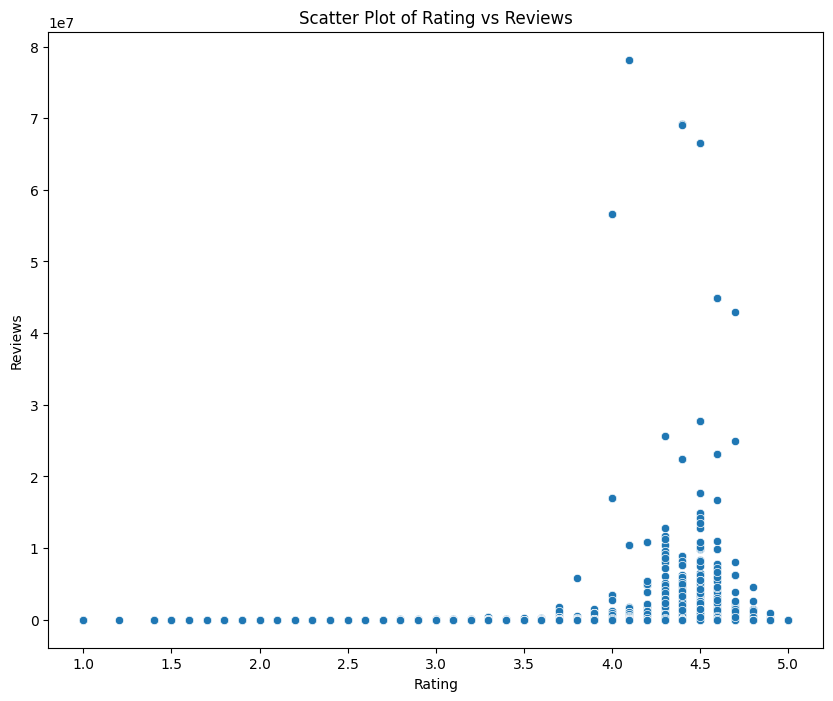

In [15]:
new_data = data_frame.copy()
new_data['Rating'] = pd.to_numeric(data_frame['Rating'], errors='coerce', downcast='float')
new_data['Reviews'] = pd.to_numeric(data_frame['Reviews'], errors='coerce',downcast='float')
plt.figure(figsize=(10, 8))
sns.scatterplot(x="Rating", y="Reviews", data=new_data, palette=random_colors)

plt.xlabel("Rating")
plt.ylabel("Reviews")
plt.title("Scatter Plot of Rating vs Reviews")

plt.show()

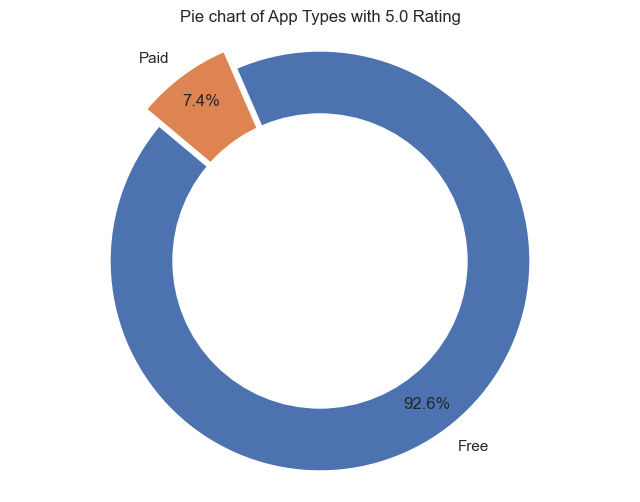

In [16]:
df_rating_5_type =  data_frame['Type'].value_counts().reset_index()

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sizes = df_rating_5_type.iloc[:, 1]
labels = df_rating_5_type.iloc[:, 0]

explode = (0, 0.1)

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=0.85, explode=explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Pie chart of App Types with 5.0 Rating')
plt.show()

C:\Users\roman\AppData\Local\Temp\ipykernel_23512\803051152.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(y='Rating',x='Type',data = data_frame.sort_values('Rating',ascending=False),kind='boxen', palette=random_colors)
C:\Users\roman\AppData\Local\Temp\ipykernel_23512\803051152.py:2: UserWarning: The palette list has more values (33) than needed (2), which may not be intended.
  sns.catplot(y='Rating',x='Type',data = data_frame.sort_values('Rating',ascending=False),kind='boxen', palette=random_colors)


<Figure size 1500x800 with 0 Axes>

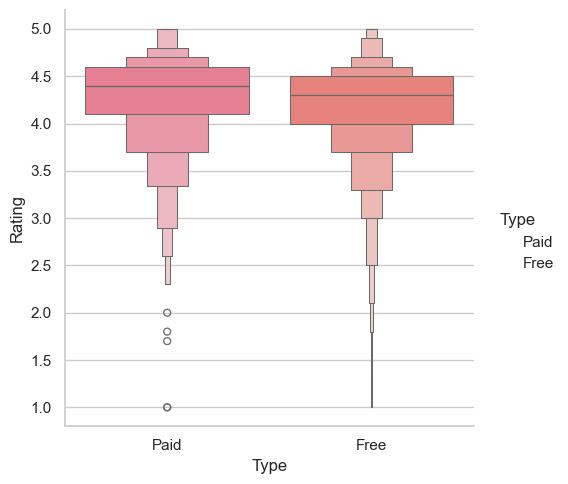

In [17]:
plt.figure(figsize=(15,8))
sns.catplot(y='Rating',x='Type',data = data_frame.sort_values('Rating',ascending=False),kind='boxen', palette=random_colors)

<Axes: xlabel='Content Rating', ylabel='Installs'>

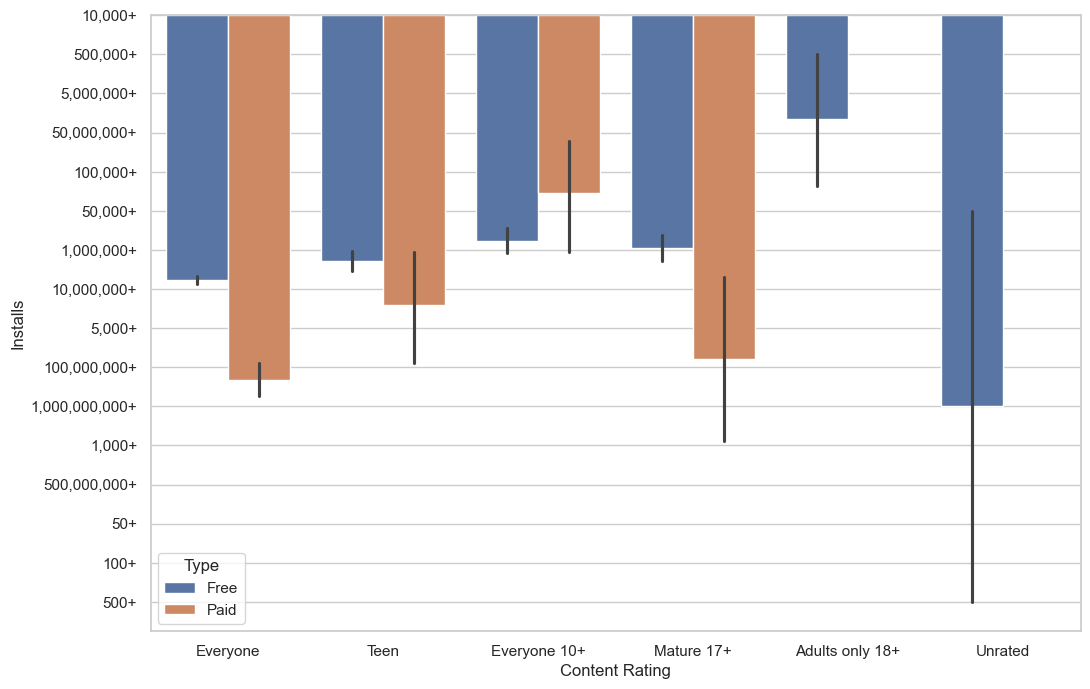

In [18]:
plt.figure(figsize=(12,8))
sns.barplot(x="Content Rating", y="Installs", hue="Type", data=df)